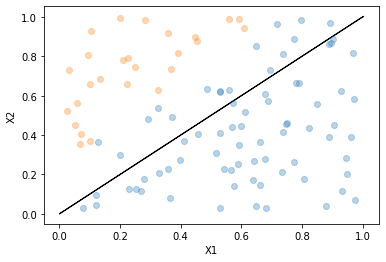

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(vetor,rotaciona)
    return perp

X, y = geradataset(100)
plotadataset(X, y)
vetor = [1, -1]
hiperplano = perpendicular(vetor)
plt.arrow(*[0,0], *hiperplano)
plt.show()

# Funções de Custo

In [26]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


# Perceptron

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.014
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

465.16621118002945
65.54480605332317
605.7791830721508
85.42769952108947
850.6458864217844
178.51840230975722
1268.9892794160921
416.6823861611403
1987.423851685166
940.8992932983111
3236.387524958498
2021.5882758052492
5436.11355416054
4171.607554553552
9355.634233792582
8357.175488185227
16406.96226118335
16390.842534701398
29189.736714658662
31662.838074640138
[14.2421985   9.49653575  6.0013374 ]
0.74


In [28]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[  0.6397675 ,   0.91009687,   0.67074913],
        [ -0.71567927,   0.30536659,  -0.2581265 ],
        [  0.91448831,   1.32679418,   0.40394282],
        [ -0.9447125 ,   0.41413433,  -0.74490384],
        [  1.26503946,   1.72712812,   0.26107872],
        [ -1.27829233,   0.41393919,  -1.21161391],
        [  1.72312178,   2.14105274,   0.24144835],
        [ -1.75050663,   0.29712765,  -1.69160009],
        [  2.33115002,   2.60174514,   0.35356511],
        [ -2.40849735,   0.04649369,  -2.22185793],
        [  3.14628404,   3.14838976,   0.61653217],
        [ -3.31705975,  -0.36674808,  -2.84611545],
        [  4.24589216,   3.82963087,   1.06231828],
        [ -4.56493434,  -0.98602702,  -3.6186634 ],
        [  5.73497171,   4.70800729,   1.73918467],
        [ -6.27340022,  -1.873831  ,  -4.60928373],
        [  7.75624077,   5.86578211,   2.71661195],
        [ -8.60799967,  -3.11790977,  -5.90973515],
        [ 10.50387293,   7.41271754,   4.09221684],
        [-11

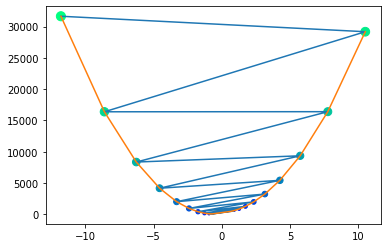

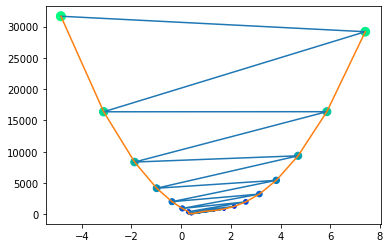

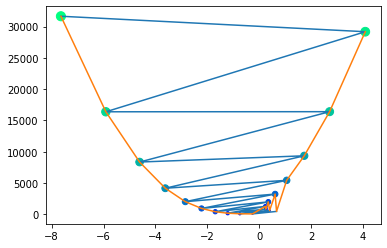

In [41]:
for i in range(whist.shape[1]):
    plt.plot(whist[:,i], chist, '-')
    seq = [j**1.5 for j in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='winter')
    idx = np.argsort(whist[:,i])
    plt.plot(whist[idx,i], chist[idx])
    plt.show()

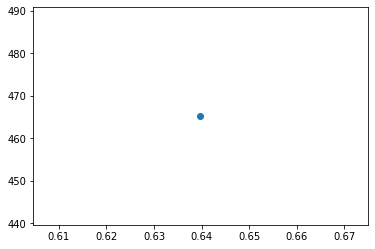

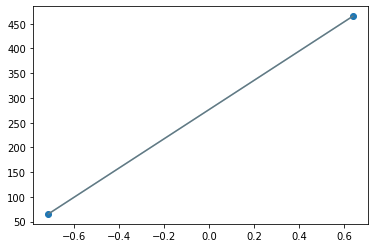

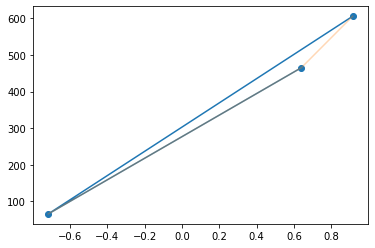

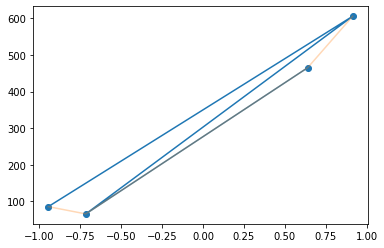

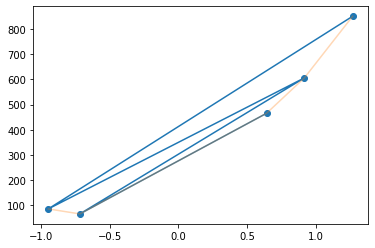

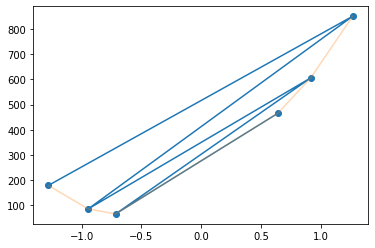

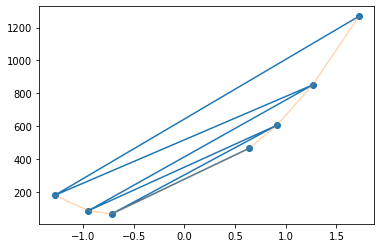

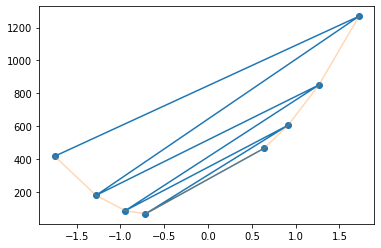

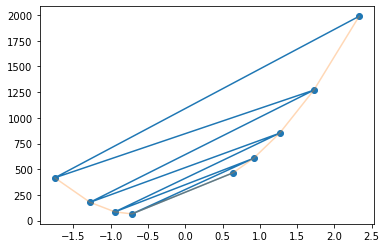

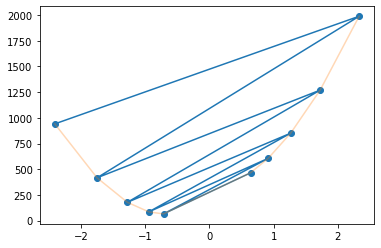

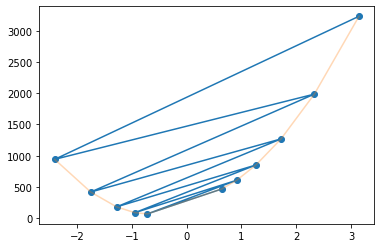

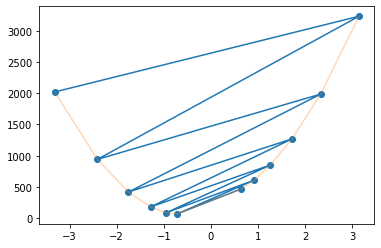

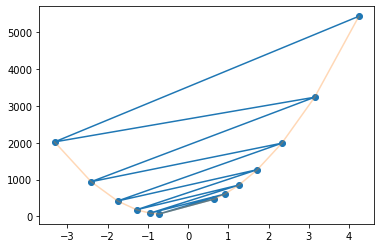

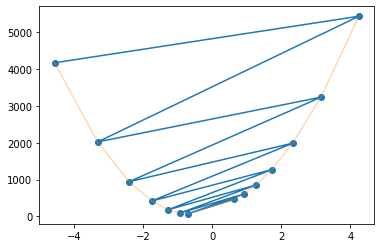

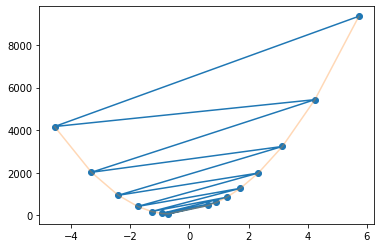

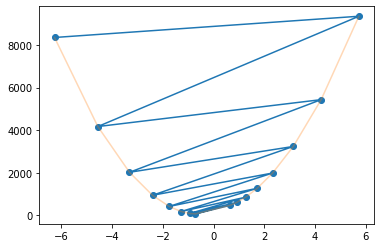

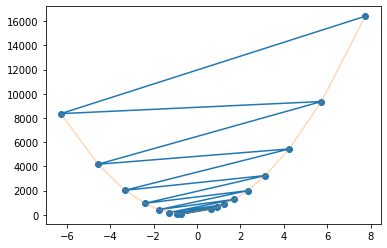

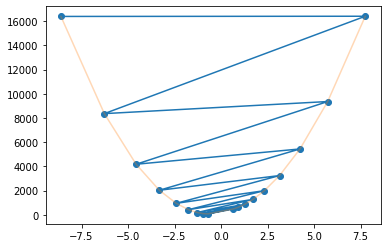

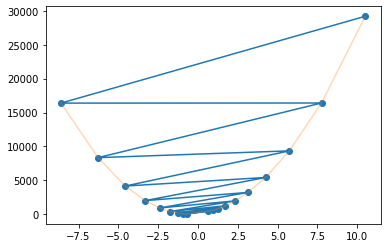

In [38]:
for i in range(1):
    for j in range(1,len(chist)):
        plt.plot(whist[:j,i], chist[:j], 'o-')
        idx = np.argsort(whist[:j,i])
        plt.plot(whist[idx,i], chist[idx], alpha=0.3)
        plt.show()